# Decision Tree Algorithm

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data/tree.csv")
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [6]:
x = df.drop(['Days','Wear Jacket?'], axis=1)
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [7]:
y = df[["Wear Jacket?"]]
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


In [8]:

from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()


In [15]:
Outlook=le.fit_transform(df.Outlook)
Temprature=le.fit_transform(df.Temprature)
Routine=le.fit_transform(df.Routine)

In [16]:
x['Outlook']=Outlook

In [17]:
x['Temprature']=Temprature

In [18]:
x['Routine']=Routine

In [20]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [21]:
from sklearn import tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier()

In [24]:
dt.fit(x,y)

DecisionTreeClassifier()

[Text(0.6666666666666666, 0.875, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

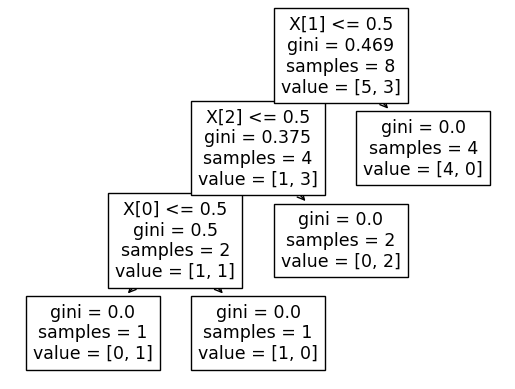

In [29]:
tree.plot_tree(dt)

[Text(0.6666666666666666, 0.875, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

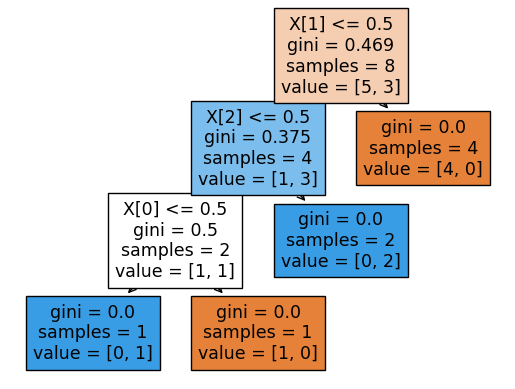

In [30]:
tree.plot_tree(dt, filled=True)

In [31]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

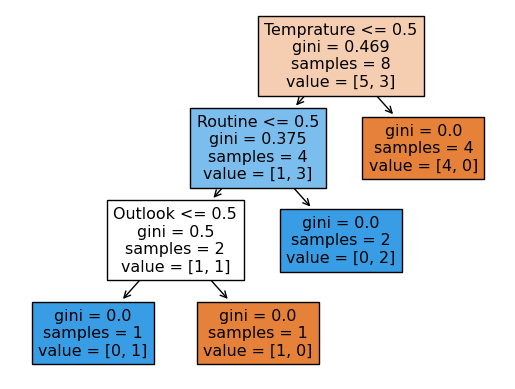

In [32]:
tree.plot_tree(dt,filled=True, feature_names=x.columns)

In [33]:
dt.predict([[1,0,0]])

/home/ashiq/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.75, random_state=1)

In [36]:
xtrain

,Outlook,Temprature,Routine
1,0,0,0
6,0,1,0
0,1,0,0
4,0,0,1
3,1,0,1
5,1,1,1


In [37]:
xtest

,Outlook,Temprature,Routine
7,1,1,0
2,0,1,1


In [38]:
ytrain

,Wear Jacket?
1,Yes
6,No
0,No
4,Yes
3,Yes
5,No


In [39]:
ytest

,Wear Jacket?
7,No
2,No


In [40]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [41]:
dt.score(xtrain, ytrain)

1.0

In [42]:
dt.score(xtest, ytest)

1.0

In [43]:
pred_y=dt.predict(xtest)
pred_y

array(['No', 'No'], dtype=object)

In [44]:
ytest

,Wear Jacket?
7,No
2,No


In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [50]:
print(classification_report(ytest,pred_y))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [52]:
accuracy_score(ytest,pred_y)

1.0

In [53]:
print(confusion_matrix(ytest, pred_y))

[[2]]


In [55]:
import seaborn as sns

<AxesSubplot: >

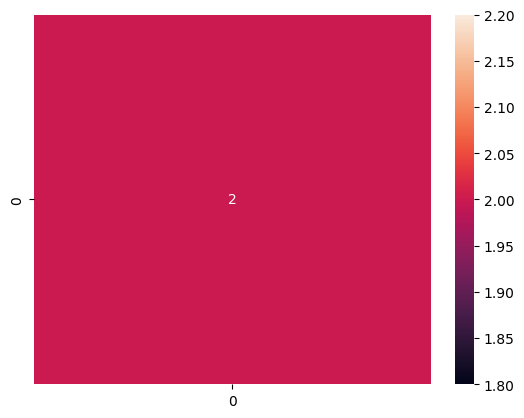

In [56]:
cm = confusion_matrix(ytest, pred_y)
sns.heatmap(cm,annot=True)

/home/ashiq/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/ashiq/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


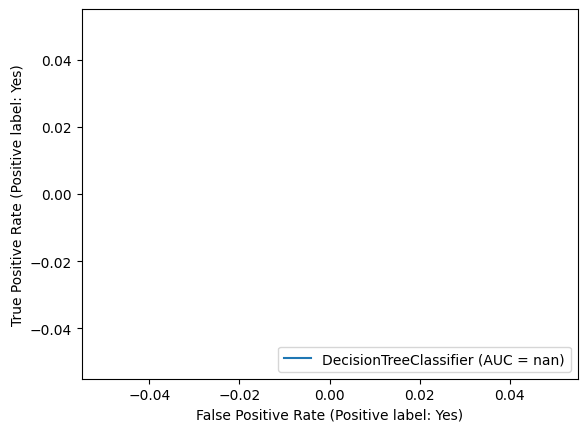

In [57]:
plot_roc_curve(dt,xtest,ytest)